# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

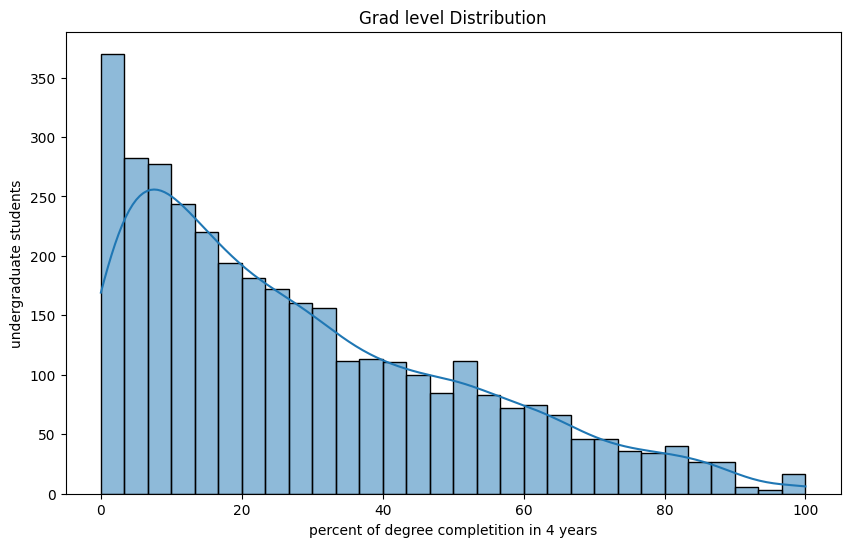

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

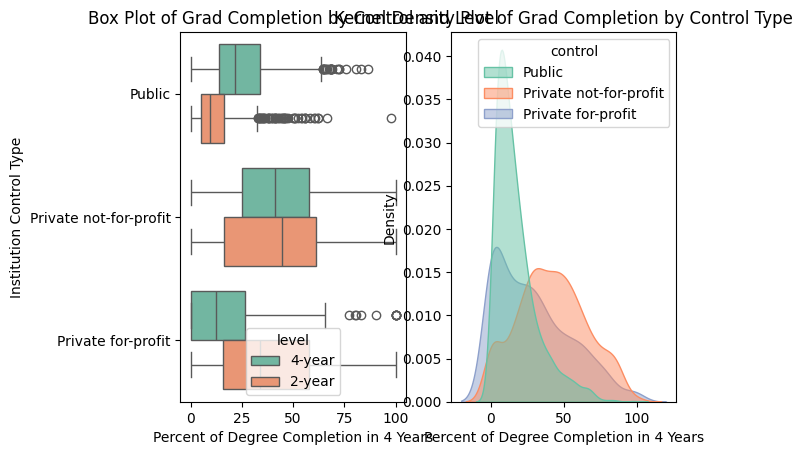

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_college= pd.read_csv('college_completion.csv')

df_college.shape
#we see 3798 columns and 63 rows

df_level= df_college['level']




crosstab= pd.crosstab(df_college['control'], df_college['level'])
#you can see the highest number of 4 year participants in the private nonprofit section
#2 year public also has the highest number for the 2 year group





#histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_college['grad_100_value'], kde=True, bins=30)
plt.title('Grad level Distribution')
plt.xlabel('percent of degree completition in 4 years')
plt.ylabel('undergraduate students')
plt.show()

#boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='grad_100_value', y='control', hue='level', data=df_college, palette='Set2')
plt.title('Box Plot of Grad Completion by Control and Level')
plt.xlabel('Percent of Degree Completion in 4 Years')
plt.ylabel('Institution Control Type')

# Kernel Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_college, x='grad_100_value', hue='control', fill=True, common_norm=False, palette='Set2', alpha=0.5)
plt.title('Kernel Density Plot of Grad Completion by Control Type')
plt.xlabel('Percent of Degree Completion in 4 Years')
plt.ylabel('Density')



#statistical description
grouped_description = df_college.groupby(['level', 'control'])['grad_100_value'].describe()
grouped_description

#it seems that private not for profit 2 year instituions have the best graduation rate

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled?
Summarize your opinion of the data dictionary.

It seems that some values either have zero in them or a complete null. IT is unknown whether they had data in those areas and didn't implement it or if the opiod prescription rate in those countries was truly zero.



4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

opiod prescription rate and opiod prescription rate 5 year change, along with the different states.




5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

It seems there is an even entry for each state which is good, we'll excuse the messiness of the graph. It also seems like we have some pretty stark outliers for the Prescribing rate

6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?

Clearly, there are certain peaks in the data indiciating that we have more data points then others.



7. Create a scatter plot, and describe the relationship you see.

Interestingly, there are staistics on how bad the opiod crisis is in Rhode island and you can see it within the scatter plot data


8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

Some states in fact have more instances than others.

<ipython-input-23-c5992ba05876>:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_opiod= pd.read_csv('opiod.csv')


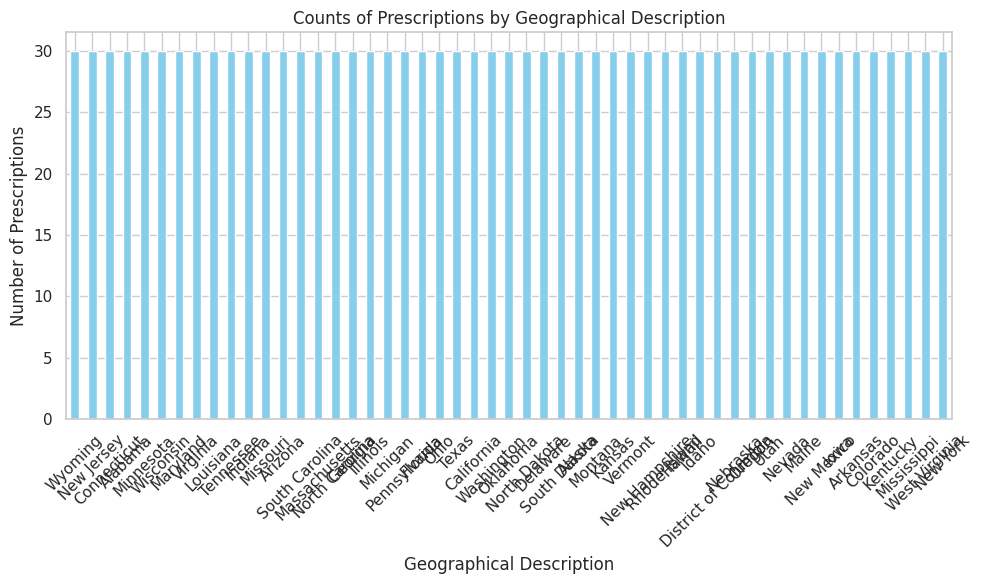

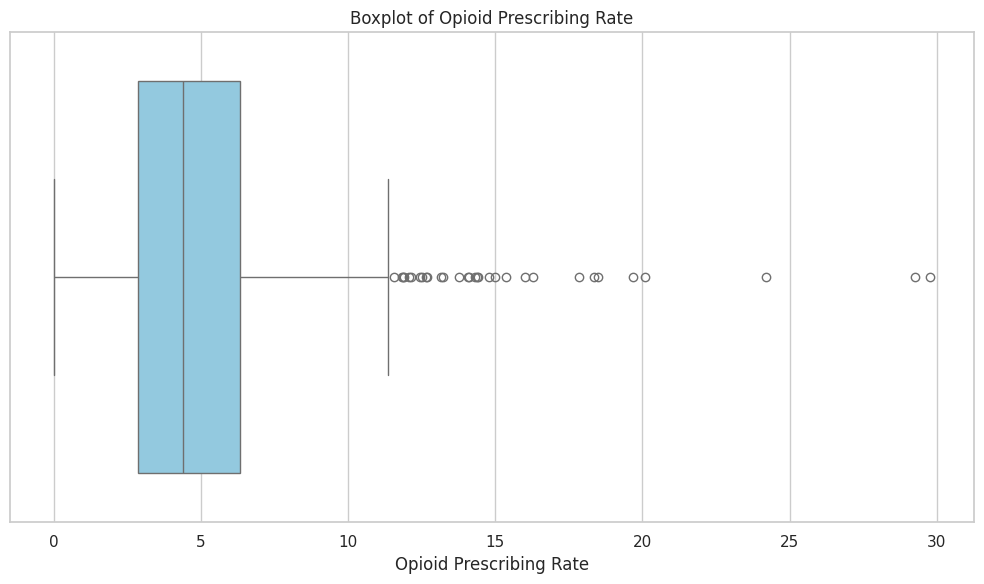

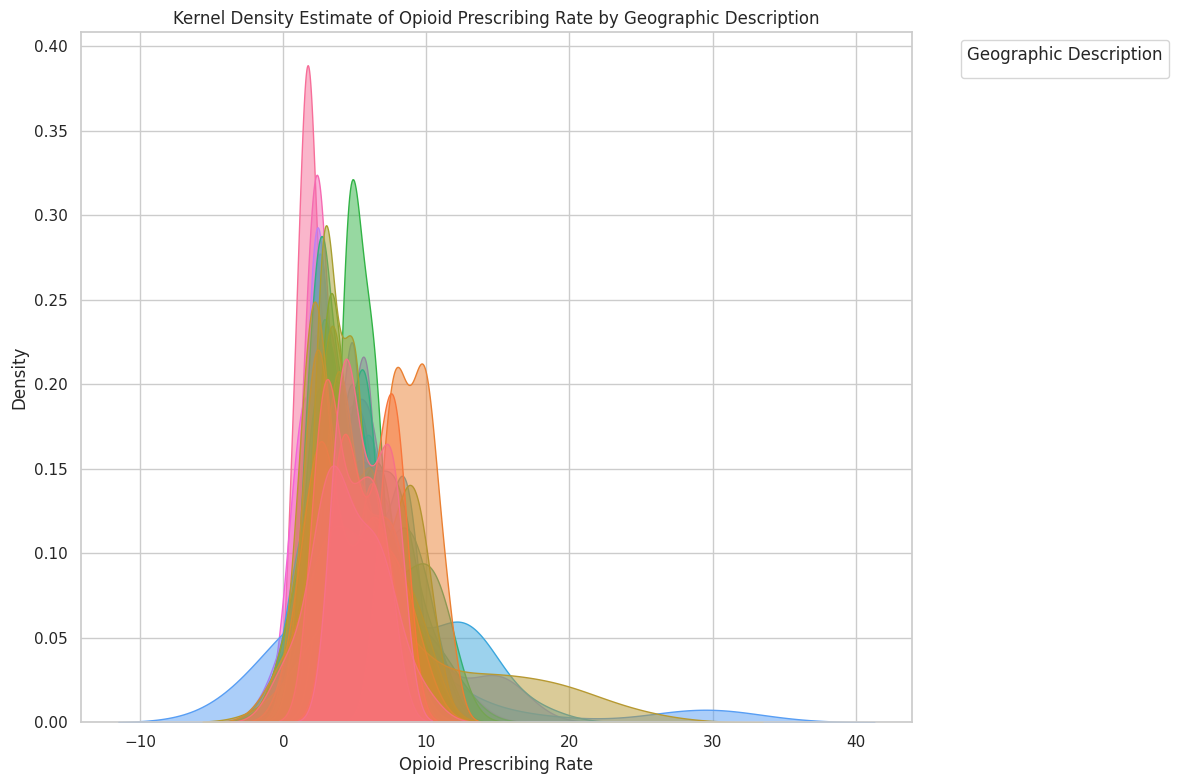

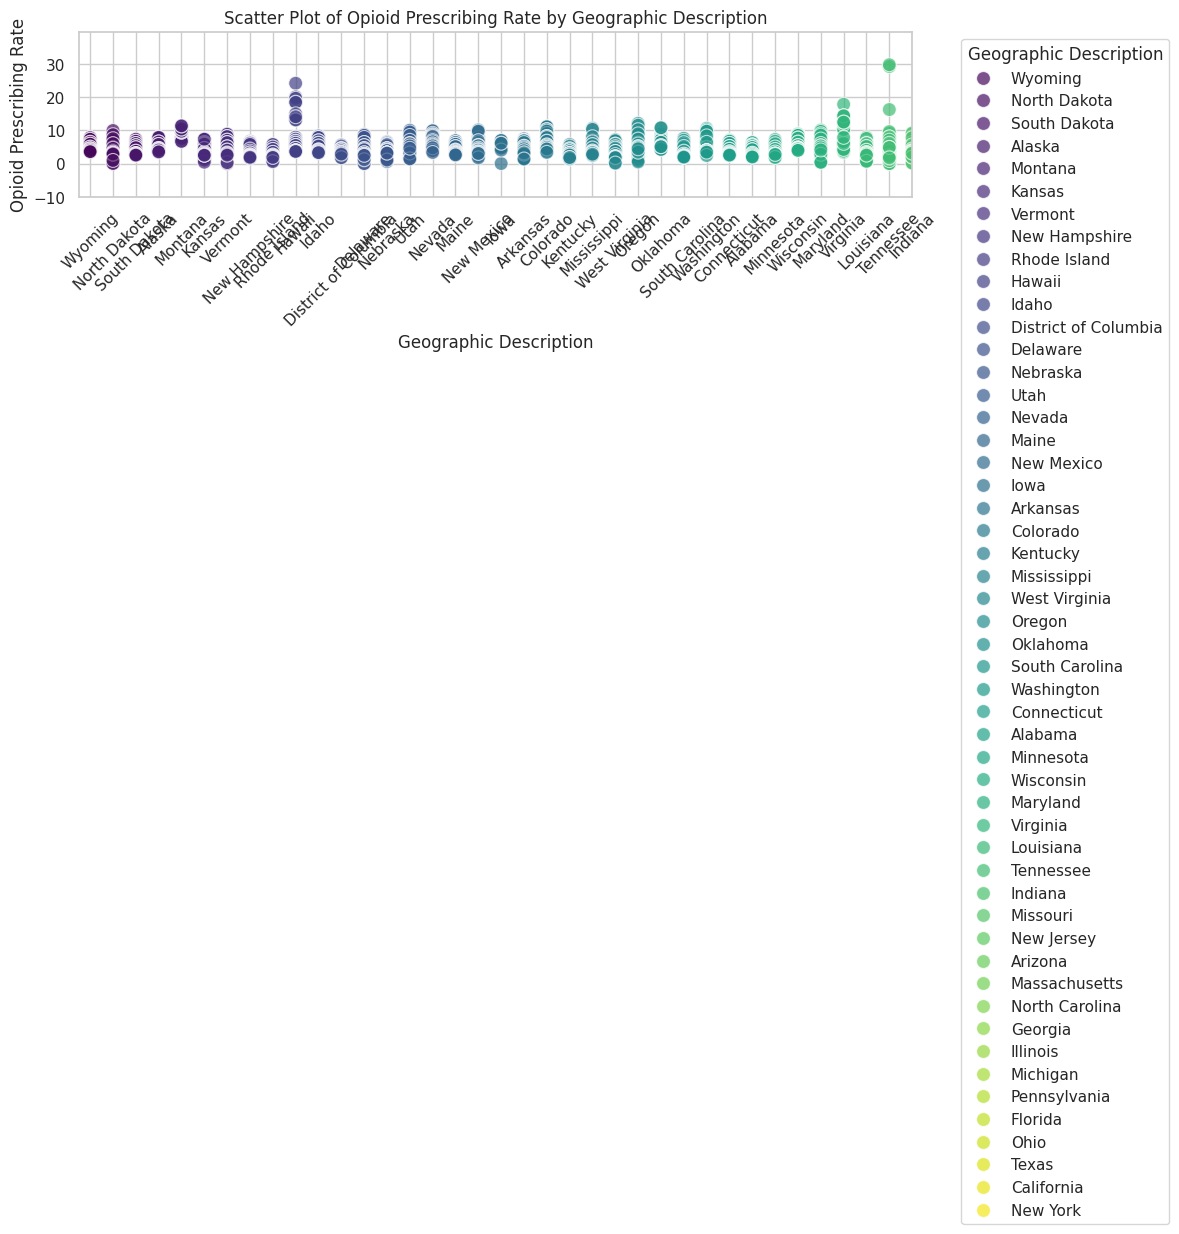

,count,mean,std,min,25%,50%,75%,max
Geo_Desc,,,,,,,,
Alabama,20.0,4.253000,1.574207,1.99,2.7100,4.515,5.6300,6.33
Alaska,20.0,5.978000,1.706667,3.53,4.3000,6.135,7.6600,7.90
Arizona,30.0,7.209000,3.892343,3.12,3.9575,6.275,9.0625,16.00
Arkansas,23.0,4.752609,2.087925,1.38,3.2700,4.790,6.7500,7.44
California,30.0,4.191667,1.501436,0.69,2.9650,4.025,5.3625,6.77
Colorado,27.0,7.048889,2.687938,3.39,4.8700,6.670,9.4400,11.10
Connecticut,20.0,4.427000,1.664250,2.55,2.8700,3.915,6.0900,7.02
Delaware,30.0,3.878667,2.396307,0.00,2.4825,3.245,5.3050,8.75
District of Columbia,30.0,3.734000,1.139082,1.76,2.8000,3.595,4.7225,5.59


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_opiod= pd.read_csv('opiod.csv')


df_prscp = df_opiod[(df_opiod['Geo_Desc'] != 'National') & (~df_opiod['Geo_Desc'].str.contains(':'))]

geo_counts = df_prscp['Geo_Desc'].value_counts()

# Create the bar graph
plt.figure(figsize=(10, 6))

geo_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Counts of Prescriptions by Geographical Description')
plt.xlabel('Geographical Description')
plt.ylabel('Number of Prescriptions')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



sns.set(style='whitegrid')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_prscp['Opioid_Prscrbng_Rate'], color='skyblue')

plt.title('Boxplot of Opioid Prescribing Rate')
plt.xlabel('Opioid Prescribing Rate')

# Show the plot
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_prscp, x='Opioid_Prscrbng_Rate', hue='Geo_Desc', fill=True, common_norm=False, alpha=0.5)

# Add titles and labels
plt.title('Kernel Density Estimate of Opioid Prescribing Rate by Geographic Description')
plt.xlabel('Opioid Prescribing Rate')
plt.ylabel('Density')

# Add the legend
plt.legend(title='Geographic Description', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_prscp, x='Geo_Desc', y='Opioid_Prscrbng_Rate', hue='Geo_Desc', palette='viridis', s=100, alpha=0.7)

# Add titles and labels
plt.title('Scatter Plot of Opioid Prescribing Rate by Geographic Description')
plt.xlabel('Geographic Description')
plt.ylabel('Opioid Prescribing Rate')

# Rotate x labels for better visibility
plt.xticks(rotation=45)

# Widen the bounds (adjust values as needed)
plt.ylim(df_prscp['Opioid_Prscrbng_Rate'].min() - 10, df_prscp['Opioid_Prscrbng_Rate'].max() + 10)  # Adjust the y limits
plt.xlim(-0.5, len(df_prscp['Geo_Desc'].unique()) - 15)

# Add the legend
plt.legend(title='Geographic Description', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


grouped_opiod = df_prscp.groupby(['Geo_Desc'])['Opioid_Prscrbng_Rate'].describe()
grouped_opiod